<a href="https://colab.research.google.com/github/kallebcintra/Artificial-Intelligence/blob/main/Atividade_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sudoku

A seguir temos uma implementação para o famoso jogo Sudoku.

Nessa implementação, cada casa do tabuleiro é representada como uma combinação de uma letra (A, B, C, ..., I) e um número (1, 2, 3, ..., 9) conforme ilustrado na figura a seguir:

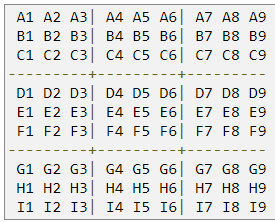

In [ ]:
rows = 'ABCDEFGHI'
cols = '123456789'

def cross(a, b):
    return [s+t for s in a for t in b]

boxes = cross(rows, cols)
print(f'[{boxes[0]}, {boxes[1]}, {boxes[2]}, ... , {boxes[-3]}, {boxes[-2]}, {boxes[-1]}]')

[A1, A2, A3, ... , I7, I8, I9]


Para representar o tabuleiro, são utilizadas duas formas:

  - *grid_str*: representação em string para o estado inicial do tabuleiro, em que as casas estão dispostas em sequência ("[A1][A2]...[A9][B1][B2]...[B9]...[I9]") com as casas vazias sendo representadas com um ponto e as preenchidas com os seus próprios valores;
  - *grid_dict*: representação em dicionário em que as chaves são as casas e os valores são pontos para casas vazias ou dígitos de 1 a 9 para casas preenchidas.

A seguir, temos um tabuleiro e suas respectivas representações exemplificando o proposto acima:

In [ ]:
grid_str = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
grid_dict = dict(zip(boxes, grid_str))

In [ ]:
def display(grid_dict):
    """
    Display the values as a 2-D grid.
    Input: The sudoku in dictionary form
    Output: None
    """
    width = 1+max(len(grid_dict[s]) for s in boxes)
    line = '+'.join(['-'*(width*3 + 1)]*3)
    for r in rows:
        print('', ''.join(grid_dict[r+c].center(width)+('| ' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)

display(grid_dict)

 4 . . | . . . | 8 . 5 
 . 3 . | . . . | . . . 
 . . . | 7 . . | . . . 
-------+-------+-------
 . 2 . | . . . | . 6 . 
 . . . | . 8 . | 4 . . 
 . . . | . 1 . | . . . 
-------+-------+-------
 . . . | 6 . 3 | . 7 . 
 5 . . | 2 . . | . . . 
 1 . 4 | . . . | . . . 


A partir dessa representação, são definidas listas de 9 casas que precisam obedecer às regras do jogo, ou seja, uma lista para cada linha do tabuleiro, uma para cada coluna e uma para cada quadrado pontilhado ilulstrado na figura anterior. Cada uma dessas listas é chamada aqui de *unit*.

In [ ]:
row_units = [cross(r, cols) for r in rows]
column_units = [cross(rows, c) for c in cols]
square_units = [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')]

unitlist = row_units + column_units + square_units

print(row_units[0], column_units[0], square_units[0], sep='\n')

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']
['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1']
['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']


Essa representação nos permite modelar o jogo como um *Factor Graph* em que cada casa é uma variável e as regras do jogo definem os fatores que relacionam essas variáveis. Com esse modelo em mente, são definidos os dicionários *units* e *peers*:

  - *units*: dicionário em que as chaves são as casas do tabuleiro e os valores são as listas às quais cada casa pertence;
  - *peers*: dicionário em que as chaves são as casas do tabuleiro e os valores são um conjunto (sem repetição) com todas as casas que são consideradas vizinhas da casa chave avaliada.

A figura a seguir ilustra esses conceitos para a casa C2:

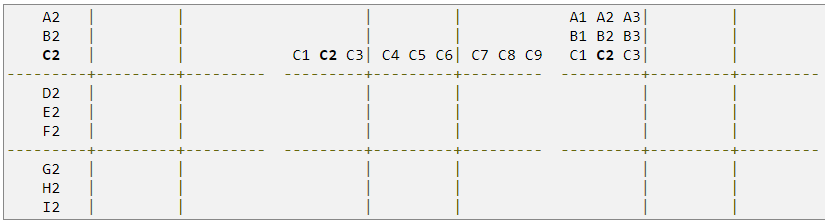

## Exercício 1: Representando os fatores

Implemente um código que gera os dicionários *units* e *peers*.

Exemplo:

*units*:
```
In:  print(units['C2'])
=============================================================================================================================================================================
Out: [['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'], ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]
```

*peers*:
```
In:  print(peers['C2'])
=============================================================================================================================
Out: {'C8', 'B2', 'C1', 'E2', 'C5', 'H2', 'G2', 'C6', 'D2', 'C9', 'A2', 'C7', 'B1', 'C3', 'A3', 'F2', 'C4', 'A1', 'B3', 'I2'}
```


In [ ]:
units = dict((cell, [unit for unit in unitlist if cell in unit]) for cell in boxes)
peers = dict((cell, set(sum(units[cell],[]))-set([cell]))for cell in boxes)
print(units['C2'])
print(peers['C2'])

[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'], ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]
{'C9', 'D2', 'H2', 'B1', 'I2', 'C4', 'C7', 'C6', 'F2', 'C1', 'C8', 'C5', 'E2', 'B2', 'A1', 'C3', 'B3', 'A3', 'A2', 'G2'}


## Exercício 2: Representando as variáveis e seus domínios



Implemente a função *grid_values* que recebe como input o tabuleiro inicial em formato *grid_str* e retorna um dicionário *values* em que as chaves são as casas e os valores são os domínios, isto é, os conjuntos de valores possíveis para cada casa.

Exemplo:

```
In:  values = grid_values(grid_str)
     display(values)
===============================================================================================
Out:
     4     123456789 123456789 | 123456789 123456789 123456789 |     8     123456789     5     
 123456789     3     123456789 | 123456789 123456789 123456789 | 123456789 123456789 123456789
 123456789 123456789 123456789 |     7     123456789 123456789 | 123456789 123456789 123456789
-------------------------------+-------------------------------+-------------------------------
 123456789     2     123456789 | 123456789 123456789 123456789 | 123456789     6     123456789
 123456789 123456789 123456789 | 123456789     8     123456789 |     4     123456789 123456789
 123456789 123456789 123456789 | 123456789     1     123456789 | 123456789 123456789 123456789
-------------------------------+-------------------------------+-------------------------------
 123456789 123456789 123456789 |     6     123456789     3     | 123456789     7     123456789
     5     123456789 123456789 |     2     123456789 123456789 | 123456789 123456789 123456789
     1     123456789     4     | 123456789 123456789 123456789 | 123456789 123456789 123456789
```

In [ ]:
def grid_values(grid):
    #lista que armazena os caracteres presentes na grid e os possíveis caso for vazio
    chars = [c if c in '123456789' else '123456789' for c in grid]
    return dict(zip(boxes, chars))


In [ ]:
values = grid_values(grid_str)
#print(values)
display(values)

     4     123456789 123456789 | 123456789 123456789 123456789 |     8     123456789     5     
 123456789     3     123456789 | 123456789 123456789 123456789 | 123456789 123456789 123456789 
 123456789 123456789 123456789 |     7     123456789 123456789 | 123456789 123456789 123456789 
-------------------------------+-------------------------------+-------------------------------
 123456789     2     123456789 | 123456789 123456789 123456789 | 123456789     6     123456789 
 123456789 123456789 123456789 | 123456789     8     123456789 |     4     123456789 123456789 
 123456789 123456789 123456789 | 123456789     1     123456789 | 123456789 123456789 123456789 
-------------------------------+-------------------------------+-------------------------------
 123456789 123456789 123456789 |     6     123456789     3     | 123456789     7     123456789 
     5     123456789 123456789 |     2     123456789 123456789 | 123456789 123456789 123456789 
     1     123456789     4     | 1234567

## Exercício 3: Backtracking

A função *search* implementa o algoritmo de busca por backtracking para solução de factor graphs apresentado em aula. Implemente as funções a seguir para que o algoritmo funcione corretamente:

  - *is_solved*: recebe como input um dicionário *values* e retorna uma booleana indicando se o tabuleiro está resolvido;
  - *random_choice*: recebe como input um dicionário *values* e retorna uma casa não preenchida aleatória do tabuleiro;
  - *fixed_order*: recebe como input um domínio e retorna um iterador dos valores desse domínio em uma ordem fixa qualquer (dica: retornar na mesma ordem que recebeu é uma solução válida);
  - *get_partial_weight*: recebe como input um dicionário *values* e retorna o peso parcial resultante dos valores das casas preenchidas e seus respectivos fatores;
  - *eliminate*: recebe como input um dicionário *values* e retorna esse dicionário com os domínios atualizados utilizando a estratégia de eliminação, isto é:
    "Se uma casa só tem um único possível valor em seu domínio, elimina esse valor dos domínios dos seus vizinhos (peers)."
  - *has_empty_domain*: recebe um dicionário *values* e retorna uma booleana indicando se alguma casa no tabuleiro não tem mais possibilidades de valores em seu domínio.

In [ ]:
import random

def is_solved(values):
    for unit in unitlist:
        unit_values = set(values[s] for s in unit)
        if unit_values != set(cols):
            return False
    return True

def get_cells_nao_preenchidas(values):
  return [cell for cell, value in values.items() if len(value) > 1]

def random_choice(values):
    cells_nao_preenchidas = get_cells_nao_preenchidas(values)
    if cells_nao_preenchidas:
        return random.choice(cells_nao_preenchidas)
    else:
        return None

def fixed_order(values, box):
    return iter(values[box])

#Se a cell tem valor igual ao de algum dos seus peers, o peso parcial é 0, e a cell precisa ser trocada
def get_partial_weight(values):
    cells_preenchidas = {cell: value for cell, value in values.items() if len(value) == 1}
    for cell, value in cells_preenchidas.items():
      for peer in peers[cell]:
          if peer in cells_preenchidas and value in cells_preenchidas[peer]:
            return 0
    return 1

def eliminate(values):
    for cell, value in values.items():
        if len(value) == 1:
            for peer in peers[cell]:
                values[peer] = values[peer].replace(value, '')
    return values

def has_empty_domain(values):
    for value in values.values():
        if len(value) == 0:
            return True
    return False

def search(values,
           choose_variable=random_choice,
           sort_domain=fixed_order,
           lookahead=eliminate):
    if is_solved(values):
        return values
    # Escolher um dos dominios não preeenchidos
    k = choose_variable(values)
    sorted_domain = sort_domain(values,k)
    #Usando recorrência para solucionar os sudokus
    for v in sorted_domain:
        new_values = values.copy()
        new_values[k] = v
        delta = get_partial_weight(new_values)
        if delta == 0: continue
        new_values = lookahead(new_values)
        if has_empty_domain(new_values): continue
        solution = search(new_values, choose_variable, sort_domain, lookahead)
        if solution: return solution

In [ ]:
#tabuleiro fácil
grid_str = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
values = grid_values(grid_str)
solution = search(values)
if solution: display(solution)

 4 8 3 | 9 2 1 | 6 5 7 
 9 6 7 | 3 4 5 | 8 2 1 
 2 5 1 | 8 7 6 | 4 9 3 
-------+-------+-------
 5 4 8 | 1 3 2 | 9 7 6 
 7 2 9 | 5 6 4 | 1 3 8 
 1 3 6 | 7 9 8 | 2 4 5 
-------+-------+-------
 3 7 2 | 6 8 9 | 5 1 4 
 8 1 4 | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 


In [ ]:
#tabuleiro difícil
grid_str = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
values = grid_values(grid_str)
solution = search(values)
if solution: display(solution)

 4 1 7 | 3 6 9 | 8 2 5 
 6 3 2 | 1 5 8 | 9 4 7 
 9 5 8 | 7 2 4 | 3 1 6 
-------+-------+-------
 8 2 5 | 4 3 7 | 1 6 9 
 7 9 1 | 5 8 6 | 4 3 2 
 3 4 6 | 9 1 2 | 7 5 8 
-------+-------+-------
 2 8 9 | 6 4 3 | 5 7 1 
 5 7 3 | 2 9 1 | 6 8 4 
 1 6 4 | 8 7 5 | 2 9 3 


Teste a sua solução com os exemplos a seguir:

  - Tabuleiro fácil:
```
In:  
  grid_str = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
  values = grid_values(grid_str)
  solution = search(values)
  if solution: display(solution)
==============================================================================================
Out:
4 8 3 | 9 2 1 | 6 5 7
9 6 7 | 3 4 5 | 8 2 1
2 5 1 | 8 7 6 | 4 9 3
------+-------+------
5 4 8 | 1 3 2 | 9 7 6
7 2 9 | 5 6 4 | 1 3 8
1 3 6 | 7 9 8 | 2 4 5
------+-------+------
3 7 2 | 6 8 9 | 5 1 4
8 1 4 | 2 5 3 | 7 6 9
6 9 5 | 4 1 7 | 3 8 2
```
  - Tabuleiro difícil:
```
In:  
  grid_str = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
  values = grid_values(grid_str)
  solution = search(values)
  if solution: display(solution)
==============================================================================================
Out:
4 1 7 | 3 6 9 | 8 2 5
6 3 2 | 1 5 8 | 9 4 7
9 5 8 | 7 2 4 | 3 1 6
------+-------+------
8 2 5 | 4 3 7 | 1 6 9
7 9 1 | 5 8 6 | 4 3 2
3 4 6 | 9 1 2 | 7 5 8
------+-------+------
2 8 9 | 6 4 3 | 5 7 1
5 7 3 | 2 9 1 | 6 8 4
1 6 4 | 8 7 5 | 2 9 3
```



## Exercício 4: Backtracking melhorado

Implemente as funções a seguir para melhorar a performance do algoritmo de backtracking proposto no exercício anterior:

  - *most_constrained_variable*: heurística para substituir *random_choice*;
  - *least_constrained_value*: heurística para substituir *fixed_order*;
  - *reduce_sudoku_strategies*: implementa estratégias de solução de sudoku mais avançadas do que a estratégia *eliminate* (dica: [site com mais estratégias](http://www.sudokudragon.com/sudokustrategy.htm) - combinando *eliminate* (no site ele chama de *single possibility rule*), *only choice* e *naked twins* é possível melhorar significativamente o algoritmo de backtracking).

In [ ]:
# retorna a célula com menor domínio
def most_constrained_variable(values):
    cells_nao_preenchidas = get_cells_nao_preenchidas(values)
    return min(cells_nao_preenchidas, key = lambda cell: len(values[cell]))

def least_constrained_value_sort(values, box):
  domain = values[box]
  cells_nao_preenchidas = get_cells_nao_preenchidas(values)
  peers_nao_preenchidos = [peer for peer in peers[box] if peer in cells_nao_preenchidas]

  # peso são quantas vezes o valor aparece em algum vizinho
  # quanto menos o valor aparece nos vizinhos, menos restrito ele é
  value_weight = {key: 0 for key in domain}

  for value in domain:
    for peer in peers_nao_preenchidos:
      value_weight[value] = value_weight[value] + 1 if value in values[peer] else value_weight[value]

  ret = sorted(domain, key=value_weight.get)
  return  ret


def naked_twins(values):
    twins = []
    for cell, value in values.items():
      if cell in twins: continue
      if len(value) == 2:
        for peer in peers[cell]:
          if len(values[peer]) != 2: continue
          # podem estar ordenados
          a,b = value
          x,y = values[peer]
          # twins check
          if (a,b) == (x,y) or (a,b) == (y,x):
            twins.append(cell)
            twins.append(peer)
            # renomeando apenas
            twin = peer
            shared_peers = [p for p in peers[cell] if p in peers[twin]]

            # elimina os valores dos twins nos vizinhos compartilhados por ambos
            for shared_peer in shared_peers:
              for twin_value in values[cell]:
                values[shared_peer] = values[shared_peer].replace(twin_value, '')
    return values

def only_choice(values):
    for unit in unitlist:
        for digit in '123456789':
            dplaces = [box for box in unit if digit in values[box]]
            if len(dplaces) == 1:
                values[dplaces[0]] = digit
    return values


def reduce_sudoku_strategies(values):
  reduced_values = eliminate(values)
  reduced_values = naked_twins(reduced_values)
  reduced_values = only_choice(reduced_values)
  return reduced_values

grid_str = '..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3..'
values = grid_values(grid_str)
#display(values) # para ver a grid antes de solucionar
solution = search(values, most_constrained_variable, least_constrained_value_sort, reduce_sudoku_strategies)
if solution: display(solution)

 4 8 3 | 9 2 1 | 6 5 7 
 9 6 7 | 3 4 5 | 8 2 1 
 2 5 1 | 8 7 6 | 4 9 3 
-------+-------+-------
 5 4 8 | 1 3 2 | 9 7 6 
 7 2 9 | 5 6 4 | 1 3 8 
 1 3 6 | 7 9 8 | 2 4 5 
-------+-------+-------
 3 7 2 | 6 8 9 | 5 1 4 
 8 1 4 | 2 5 3 | 7 6 9 
 6 9 5 | 4 1 7 | 3 8 2 


## Exercício 5: Medindo performance

Proponha uma metodologia para avaliar o ganho de performance obtido com as funções implementadas no exercício anterior. Implemente experimentos utilizando a metodologia proposta para avaliar os ganhos na lista de jogos a seguir:

In [ ]:
jogos = [
    '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......',
    '52...6.........7.13...........4..8..6......5...........418.........3..2...87.....',
    '6.....8.3.4.7.................5.4.7.3..2.....1.6.......2.....5.....8.6......1....',
    '48.3............71.2.......7.5....6....2..8.............1.76...3.....4......5....',
    '....14....3....2...7..........9...3.6.1.............8.2.....1.4....5.6.....7.8...',
    '......52..8.4......3...9...5.1...6..2..7........3.....6...1..........7.4.......3.',
    '6.2.5.........3.4..........43...8....1....2........7..5..27...........81...6.....',
    '.524.........7.1..............8.2...3.....6...9.5.....1.6.3...........897........',
    '6.2.5.........4.3..........43...8....1....2........7..5..27...........81...6.....',
    '.923.........8.1...........1.7.4...........658.........6.5.2...4.....7.....9.....',
    '6..3.2....5.....1..........7.26............543.........8.15........4.2........7..',
    '.6.5.1.9.1...9..539....7....4.8...7.......5.8.817.5.3.....5.2............76..8...',
    '..5...987.4..5...1..7......2...48....9.1.....6..2.....3..6..2.......9.7.......5..',
    '3.6.7...........518.........1.4.5...7.....6.....2......2.....4.....8.3.....5.....',
    '1.....3.8.7.4..............2.3.1...........958.........5.6...7.....8.2...4.......',
    '6..3.2....4.....1..........7.26............543.........8.15........4.2........7..',
    '....3..9....2....1.5.9..............1.2.8.4.6.8.5...2..75......4.1..6..3.....4.6.',
    '45.....3....8.1....9...........5..9.2..7.....8.........1..4..........7.2...6..8..',
    '.237....68...6.59.9.....7......4.97.3.7.96..2.........5..47.........2....8.......',
    '..84...3....3.....9....157479...8........7..514.....2...9.6...2.5....4......9..56',
    '.98.1....2......6.............3.2.5..84.........6.........4.8.93..5...........1..',
    '..247..58..............1.4.....2...9528.9.4....9...1.........3.3....75..685..2...',
    '4.....8.5.3..........7......2.....6.....5.4......1.......6.3.7.5..2.....1.9......',
    '.2.3......63.....58.......15....9.3....7........1....8.879..26......6.7...6..7..4',
    '1.....7.9.4...72..8.........7..1..6.3.......5.6..4..2.........8..53...7.7.2....46',
    '4.....3.....8.2......7........1...8734.......6........5...6........1.4...82......',
    '.......71.2.8........4.3...7...6..5....2..3..9........6...7.....8....4......5....',
    '6..3.2....4.....8..........7.26............543.........8.15........8.2........7..',
    '.47.8...1............6..7..6....357......5....1..6....28..4.....9.1...4.....2.69.',
    '......8.17..2........5.6......7...5..1....3...8.......5......2..4..8....6...3....',
    '38.6.......9.......2..3.51......5....3..1..6....4......17.5..8.......9.......7.32',
    '...5...........5.697.....2...48.2...25.1...3..8..3.........4.7..13.5..9..2...31..',
    '.2.......3.5.62..9.68...3...5..........64.8.2..47..9....3.....1.....6...17.43....',
    '.8..4....3......1........2...5...4.69..1..8..2...........3.9....6....5.....2.....',
    '..8.9.1...6.5...2......6....3.1.7.5.........9..4...3...5....2...7...3.8.2..7....4',
    '4.....5.8.3..........7......2.....6.....5.8......1.......6.3.7.5..2.....1.8......',
    '1.....3.8.6.4..............2.3.1...........958.........5.6...7.....8.2...4.......',
    '1....6.8..64..........4...7....9.6...7.4..5..5...7.1...5....32.3....8...4........',
    '249.6...3.3....2..8.......5.....6......2......1..4.82..9.5..7....4.....1.7...3...',
    '...8....9.873...4.6..7.......85..97...........43..75.......3....3...145.4....2..1',
    '...5.1....9....8...6.......4.1..........7..9........3.8.....1.5...2..4.....36....',
    '......8.16..2........7.5......6...2..1....3...8.......2......7..3..8....5...4....',
    '.476...5.8.3.....2.....9......8.5..6...1.....6.24......78...51...6....4..9...4..7',
    '.....7.95.....1...86..2.....2..73..85......6...3..49..3.5...41724................',
    '.4.5.....8...9..3..76.2.....146..........9..7.....36....1..4.5..6......3..71..2..',
    '.834.........7..5...........4.1.8..........27...3.....2.6.5....5.....8........1..',
    '..9.....3.....9...7.....5.6..65..4.....3......28......3..75.6..6...........12.3.8',
    '.26.39......6....19.....7.......4..9.5....2....85.....3..2..9..4....762.........4',
    '2.3.8....8..7...........1...6.5.7...4......3....1............82.5....6...1.......',
    '6..3.2....1.....5..........7.26............843.........8.15........8.2........7..',
    '1.....9...64..1.7..7..4.......3.....3.89..5....7....2.....6.7.9.....4.1....129.3.',
    '.........9......84.623...5....6...453...1...6...9...7....1.....4.5..2....3.8....9',
    '.2....5938..5..46.94..6...8..2.3.....6..8.73.7..2.........4.38..7....6..........5'
]

Tempo do Backtracking: 1284.7117865085602
Tempo do Naked Twins: 32.694669246673584


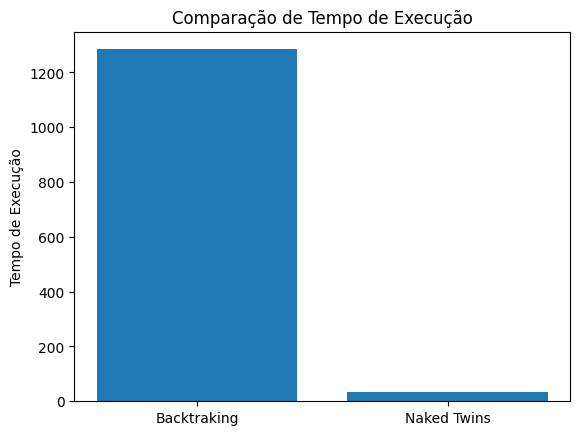

In [ ]:
import time
import timeit
import matplotlib.pyplot as plt

start_time = time.time()
grid_str = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
values = grid_values(grid_str)
solution = search(values)
end_time = time.time()
tempo_backtraking = end_time - start_time

start_time = time.time()
for jogo in jogos:
  grid_str = jogo
  values = grid_values(grid_str)
  solution = search(values, most_constrained_variable, least_constrained_value_sort, reduce_sudoku_strategies)
end_time = time.time()
tempo_naked_twins = end_time - start_time

print("Tempo do Backtracking:", tempo_backtraking)
print("Tempo do Naked Twins:", tempo_naked_twins)

algoritmos = ['Backtraking', 'Naked Twins']
tempos = [tempo_backtraking, tempo_naked_twins]

plt.bar(algoritmos, tempos)
plt.ylabel('Tempo de Execução')
plt.title('Comparação de Tempo de Execução')
plt.show()


# Resultado
Acima é executado apenas um jogo de sudoku dentre a lista de 52 jogos para o backtracking, isso pois seria inviável executar todos uma vez que a execução do algoritmo é muito lenta, dessa forma, apenas com essa única execução é possível perceber a drástica melhora na velocidade de execução do Naked Twins, uma vez que o mesmo executa os 52 jogos em um tempo muito menor que o Backtracking executa apenas 1.

